# Nicholson-Bailey Model (& Modifications): Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# this makes sure the images don't come out looking muddy on 
# retina displays (which your computer probably uses)
# Update 07/18/22: got retina working with updates thanks to 
# https://stackoverflow.com/questions/54312924/what-is-matplotlibs-retina-display-mode
%matplotlib inline
%config InlineBackend.figure_format='retina'

First, we simualte the vanilla Nicholson-Bailey host-parasitoid model with the same parameters used on p.47 of de Vries et al.'s book (see the pop. modelling demo).

In [2]:
def sim_nb(r, c, a, H0, P0, T):
    
    H = np.zeros(T+1, dtype=float)
    P = np.zeros(T+1, dtype=float)

    H[0] = H0
    
    P[0] = P0

    for n in range(1,T+1):
        
        f = np.exp(-a*P[n-1])
        
        H[n] = r * f * H[n-1]
        
        P[n] = c*(1.-f)*H[n-1]
        
    return H,P

In [3]:
r = 1.05
a = 0.005
c = 3. 

H0 = 50.
P0 = 10. 

T = 160 

In [4]:
H, P = sim_nb(r,c,a,H0,P0,int(T))

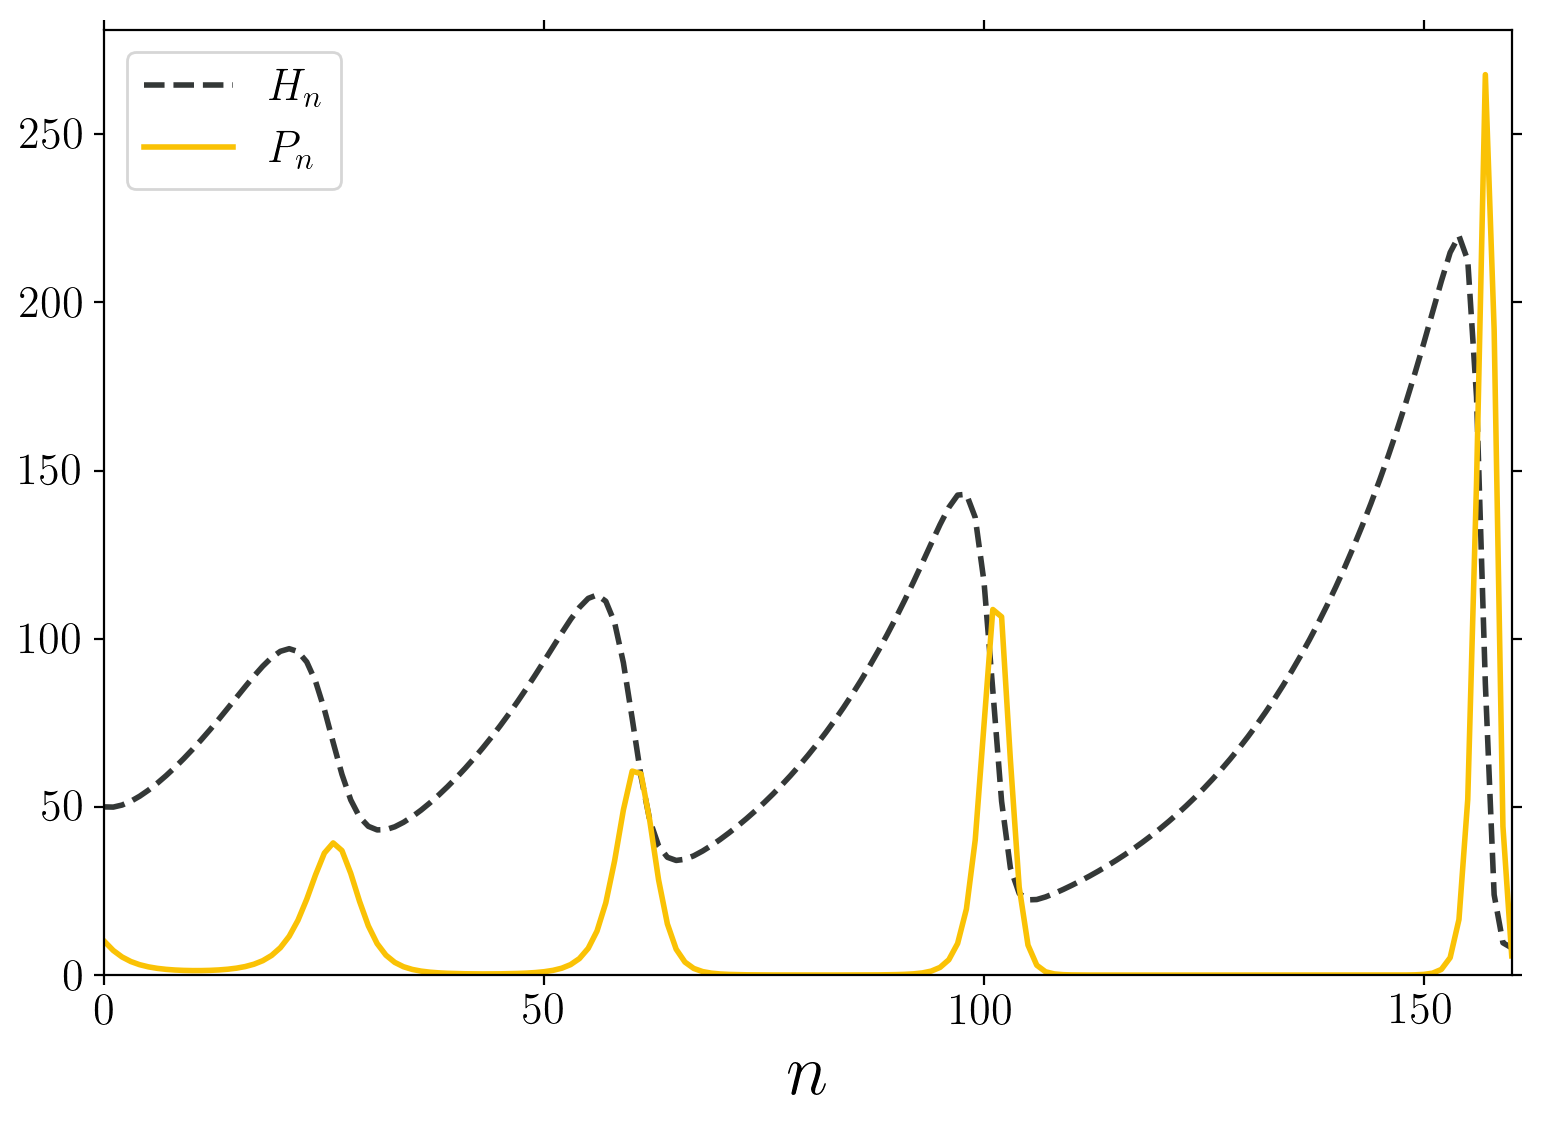

In [5]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax =plt.subplots()   
    
tt = np.arange(0,T+1)
plt.plot(tt, H, color='xkcd:charcoal', linestyle='dashed', label=r'$H_{n}$', linewidth=2)
plt.plot(tt, P, color='xkcd:goldenrod', label=r'$P_{n}$', linewidth=2)

plt.xlabel(r"$n$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([0, T])
plt.ylim([-0.01, 1.05*np.amax(P)])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'nb_sim.png'
#plt.savefig(figname, dpi=600)

plt.show()

Now we simulate a modified NB model where the unparasitized hosts reproduce according to Beverton-Holt. This should stabilize the growing oscillations a bit. It's fun to play with the BH parameters here and see what kinds of stabilization occur!

In [6]:
def sim_nb_bh(b,L, c, a, H0, P0, T):
    
    H = np.zeros(T+1, dtype=float)
    P = np.zeros(T+1, dtype=float)

    H[0] = H0
    
    P[0] = P0

    for n in range(1,T+1):
        
        f = np.exp(-a*P[n-1])
        
        H[n] = f * H[n-1]*(b*L)/(L+(b-1)*H[n-1])
        
        P[n] = c*(1.-f)*H[n-1]
        
    return H,P

In [7]:
b = 2.
L = 300. 

In [8]:
H_bh, P_bh = sim_nb_bh(b,L,c,a,H0,P0,int(T))

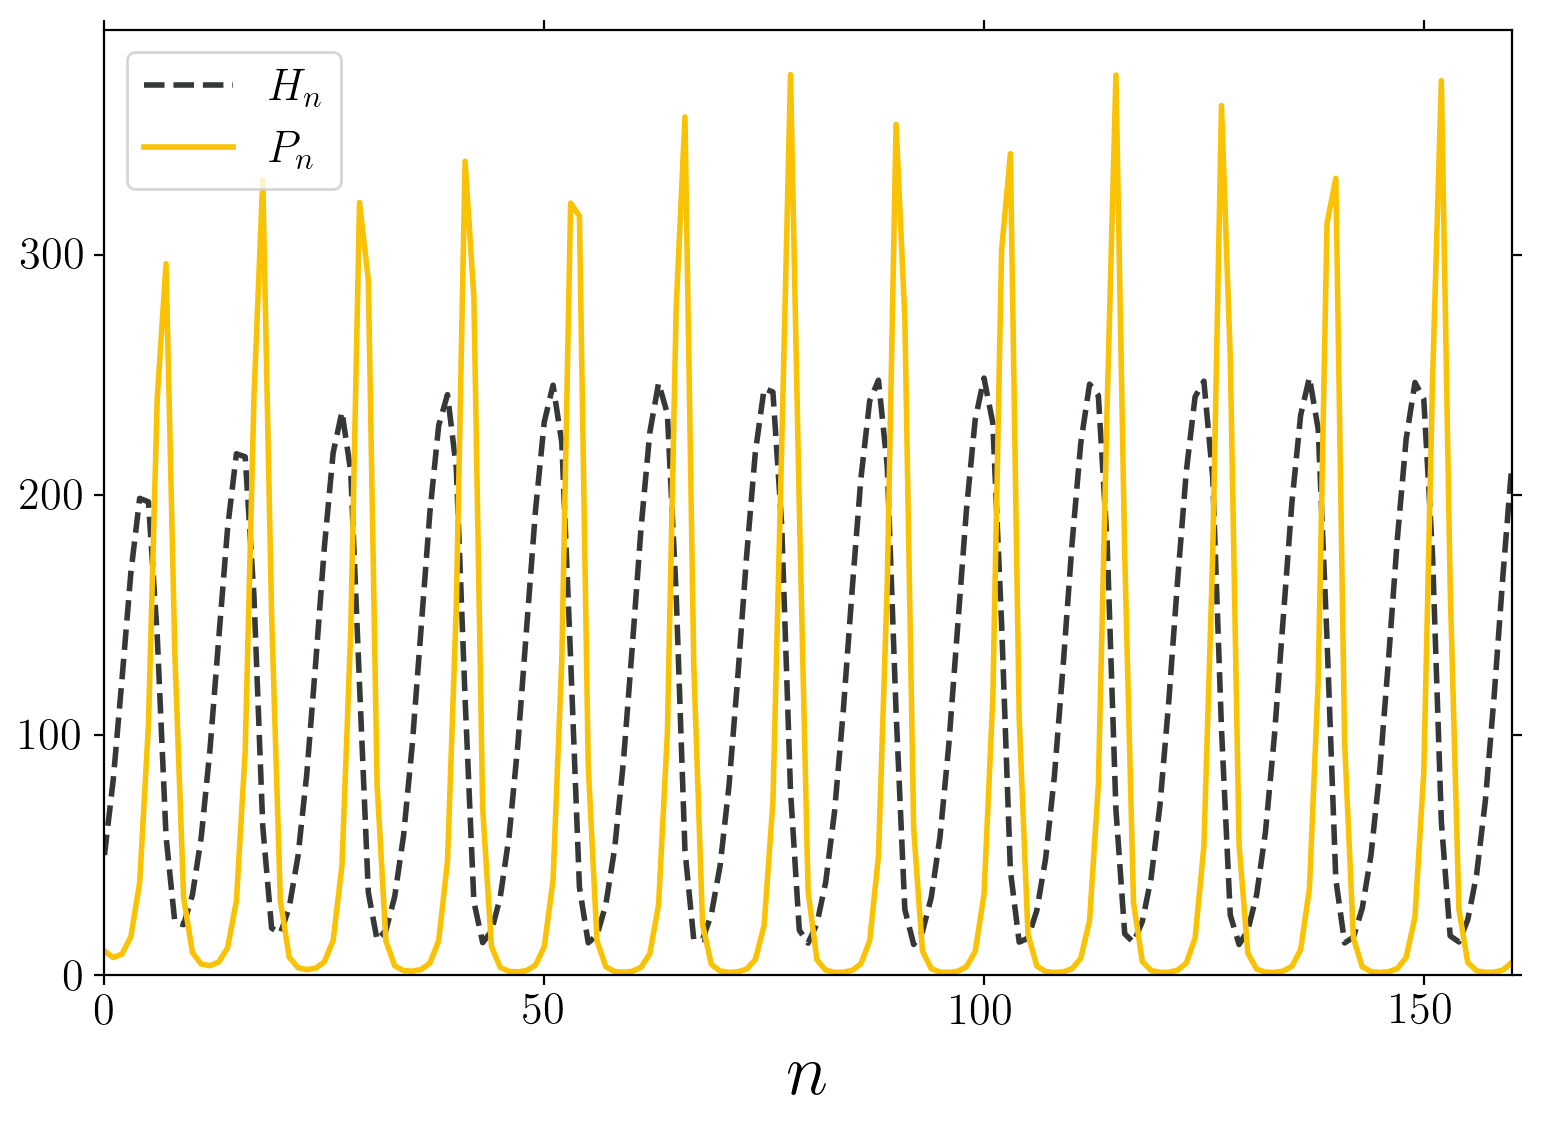

In [9]:
fig, ax =plt.subplots()   
    
tt = np.arange(0,T+1)
plt.plot(tt, H_bh, color='xkcd:charcoal', linestyle='dashed', label=r'$H_{n}$', linewidth=2)
plt.plot(tt, P_bh, color='xkcd:goldenrod', label=r'$P_{n}$', linewidth=2)

plt.xlabel(r"$n$", fontsize=26, color = 'k')

plt.tick_params(axis='x', which='both', top='off', color = 'k')
plt.xticks(fontsize=16, rotation=0, color = 'k')
plt.tick_params(axis='y', which='both', right='off', color = 'k')
plt.yticks(fontsize=16, rotation=0, color = 'k')
ax.locator_params(axis='y', nbins=6)
ax.locator_params(axis='x', nbins=4)

ax.legend(fontsize=16)

plt.xlim([0, T])
plt.ylim([-0.01, 1.05*max(np.amax(H_bh),np.amax(P_bh))])

plt.tight_layout()

fig.set_size_inches(8, 6)  
        
#figname = 'nb_bh_sim_L=%.2f' % (L) + '.png'
#plt.savefig(figname, dpi=600)

plt.show()